# Student-t Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from ipywidgets import interact, FloatSlider, HBox, Label

%matplotlib inline

### Introduction

Student's t-distribution (or simply the t-distribution) is any member of a family of continuous probability distributions that arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown. It was developed by William Sealy Gosset under the pseudonym Student.

Below we give a few examples of Student-t distribution (mainly t-test):

* Assessing the statistical significance of the difference between two sample means
* linear regression analysis
* the construction of confidence intervals for the difference between two population means
* Bayesian analysis of data from a normal family


### Details

The Student's t-distribution is a special case of the generalised hyperbolic distribution.One way to think about it is as like the Normal distribution with heavier tails.

The Student-t distribution is symmetrically peaked, and its peak is located at $\mu$, the location paramter. The peak’s width is dictated by scale parameter $\sigma$, which is positive. Finally, the shape parameter, called “degrees of freedom,” is $\nu$. This last parameter imparts the distribution with heavy tails for small $\nu$.

**PMF(PDF)**  
The probability mass function(probability density function) is given by

\begin{align}
f(y;\nu, \mu, \sigma) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)\sqrt{\pi \nu \sigma^2}}\left(1 + \frac{(y-\mu)^2}{\nu \sigma^2}\right)^{-\frac{\nu + 1}{2}}.
\end{align}

Where $v$ is the number of degrees of freedom and $\Gamma$ is the gamma function. 

The probability density function of t-distribution is symmetric and bell-shaped, like the normal distribution, but has heavier tails, meaning that it is more prone to producing values that fall far from its mean. This makes it useful for understanding the statistical behavior of certain types of ratios of random quantities, in which variation in the denominator is amplified and may produce outlying values when the denominator of the ratio falls close to zero. As the number of degrees of freedom grows, the t-distribution approaches the normal distribution with mean $\mu$ and variance $\sigma$. For this reason $\nu$ is also known as the normality parameter.

**CDF**  

The cumulative distribution function can be written in terms of $I$
, the regularized incomplete beta function. For simplicity we only show the standard t-distribution. For $t > 0$,
\begin{align*}
{\displaystyle F(t)=\int _{-\infty }^{t}f(u)\,du=1-{\tfrac {1}{2}}I_{x(t)}\left({\tfrac {\nu }{2}},{\tfrac {1}{2}}\right),}
\end{align*}
where
\begin{align*}
x(t) = \frac{\nu}{{t^2+\nu}}.
\end{align*}
Other values would be obtained by symmetry. An alternative formula, valid for $t^2 < \nu$, is
\begin{align*}
{\displaystyle \int _{-\infty }^{t}f(u)\,du={\tfrac {1}{2}}+t{\frac {\Gamma \left({\tfrac {1}{2}}(\nu +1)\right)}{{\sqrt {\pi \nu }}\,\Gamma \left({\tfrac {\nu }{2}}\right)}}\,{}_{2}F_{1}\left({\tfrac {1}{2}},{\tfrac {1}{2}}(\nu +1);{\tfrac {3}{2}};-{\tfrac {t^{2}}{\nu }}\right),}
\end{align*}
where $_2F_1$ is a particular case of the hypergeometric function.

**Mean, Variance and Moments**

For a t-distribution with $\nu$  degrees of freedom, the expected value is $\mu$ if ${\displaystyle \nu >1}$, and its variance is $\frac{\nu}{\nu-2}$ if $\nu>2$. 

For $\nu > 1$ and $\mu=0$, the raw moments of the t-distribution are
\begin{align*}
{\displaystyle \operatorname {E} (T^{k})={\begin{cases}0&k{\text{ odd}},\quad 0<k<\nu \\{\frac {1}{{\sqrt {\pi }}\Gamma \left({\frac {\nu }{2}}\right)}}\left[\Gamma \left({\frac {k+1}{2}}\right)\Gamma \left({\frac {\nu -k}{2}}\right)\nu ^{\frac {k}{2}}\right]&k{\text{ even}},\quad 0<k<\nu .\\\end{cases}}}
\end{align*}
Moments of order $\nu$  or higher do not exist.

The term for $0 < k < \nu$, k even, may be simplified using the properties of the gamma function to
\begin{align*}
{\displaystyle \operatorname {E} (T^{k})=\nu ^{\frac {k}{2}}\,\prod _{i=1}^{k/2}{\frac {2i-1}{\nu -2i}}\qquad k{\text{ even}},\quad 0<k<\nu .}
\end{align*}


In [2]:
def student_t_plot_pdf_cdf(nu,mu,sigma):
    brv = st.t(nu,mu,sigma)
    fig, ax = plt.subplots(1, 2, figsize=(14, 10))
    
    xvals = np.linspace(-2, 2, 10000)
    ax[0].bar(xvals, brv.pdf(xvals), width=0.1)
    ax[0].set_title("Probability Mass Function")
    
    xvals = np.linspace(-2, 2, 10000)
    ax[1].plot(xvals, brv.cdf(xvals))
    ax[1].set_title("Cumulative Distribution Function")
    
    return None

In [3]:
fs_nu = FloatSlider(
    value=1, min=1.0, max=10.0,
    step=0.01, description="df $\nu$",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

fs_mu = FloatSlider(
    value=0.0, min=-0.5, max=0.5,
    step=0.01, description="Mean $\mu$",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

fs_sigma = FloatSlider(
    value=0.5, min=0.1, max=1.0,
    step=0.01, description="Variance $\sigma$",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

output = interact(student_t_plot_pdf_cdf, nu=fs_nu, mu=fs_mu, sigma=fs_sigma)

interactive(children=(FloatSlider(value=1.0, description='df $\nu$', layout=Layout(width='40%'), max=10.0, min…

### Example: Passing a class

Suppose that a student needs 70 points to pass a class. The student test score in the class would be a draw from a Student-t distribution with $\mu$=75, $\sigma$=10, $\nu$=20.

In [4]:
nu,mu,sigma = 20,75,10

brv = st.t(nu,mu,sigma)

We could take a single draw from this distribution to determine whether the student's score is higher than 70.

In [5]:
score = brv.rvs()
print(score)
score>=70

65.56853197723491


False

Or we could see what happens over many similar students (according to the law of large numbers, we should expect that the fraction of students that pass the course should obey the cumulative probability in range 70+).

In [6]:
samples = brv.rvs(10000)

print(f"Fails {np.mean(samples < 70)} of the time")
print(f"Succeeds {np.mean(samples >= 70)} of the time")

print(f"The degree of freedom parameter is {nu}")
print(f"The mean parameter is {mu}")
print(f"The variance parameter is {sigma}")

Fails 0.3145 of the time
Succeeds 0.6855 of the time
The degree of freedom parameter is 20
The mean parameter is 75
The variance parameter is 10


/var/folders/fx/_k7mnq0x0lg851kcg9vwn1dh0000gn/T/ipykernel_38669/3750145490.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(samples,shade=True)


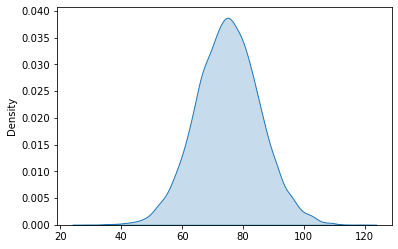

In [7]:
import seaborn as sns

sns.kdeplot(samples,shade=True)
plt.show()

**Note**: In creating this notebook, I referenced the "Distribution Explorer" material found at https://distribution-explorer.github.io/index.html  
https://wp-en.wikideck.com/Student%27s_t-distribution  
I certainly encourage others to find additional information there.